In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

%matplotlib inline

In [2]:
dt= pd.read_csv('data_airbnb_engineered.csv')

In [3]:
#NLP

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/bigfoot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bigfoot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

2023-05-13 19:39:41.775631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Load the pre-trained language model of spaCy
nlp = spacy.load("en_core_web_sm")

In [23]:
stop_words_spacy = STOP_WORDS

In [26]:
def custom_tokenizer(text):
    doc = nlp(text)
    #eliminate duplicates by switching to set and from set to list
    doc = list(set(doc))
    tokens = [token.text.lower().strip() for token in doc if not token.is_stop and token.text.lower().strip() not in stop_words_spacy and not token.is_punct and not token.is_space and token.is_alpha and not token.like_num and '+' not in token.text and '\\' not in token.text and len(token) >= 3 and token.pos_ != 'ADJ']
    return tokens

In [79]:
test = dt["amenities"]
all_tokens = []
for text in test:
    tokens = custom_tokenizer(text)
    all_tokens.extend(tokens)


In [ ]:
word_counts2 = Counter(all_tokens)
random_5 = Counter(dict(word_counts2.most_common()[5:]))

In [80]:
most_comm_5=word_counts2.most_common(5)

In [81]:
most_comm_5

[('alarm', 9982),
 ('dryer', 9740),
 ('parking', 7850),
 ('water', 7609),
 ('coffee', 7344)]

In [82]:
words_5 = [word[0] for word in most_comm_5]

For researching purpose I will just choose the 5 more common amenities + 5 random amenities with frecuency higher than 485, being the mean of the frecuencies. (I wish I could take them all , but my computer is not powerful enough)

In [54]:
np.mean(list(word_counts2.values()))

485.4531043593131

In [88]:
random_5_freq = [word for word,freq in random_5.items() if freq > 485 ]

In [151]:
import random

random_5 = random.sample(random_5_freq, 5)
random_5

['material', 'grill', 'shared', 'backyard', 'pool']

In [ ]:
#NOTE

I got this 5 random amenities, if you run the code you will get 5 different because the random feature.
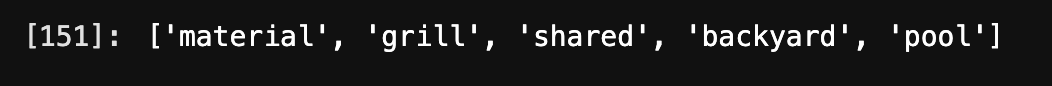


In [267]:
#I will set a static value in case you want to reproduce the same example, just have to uncomment 
#random_5= ['material', 'grill', 'shared', 'backyard', 'pool']

In [222]:
amenities_comm =words_5 + random_5

In [223]:
amenities_comm

['alarm',
 'dryer',
 'parking',
 'water',
 'coffee',
 'material',
 'grill',
 'shared',
 'backyard',
 'pool']

In [39]:
pd.set_option('display.max_rows', None)

In [176]:

def meaning_token(amenities):
    results = []
    for token in amenities:
        match_count=0
        pattern = f'([^,]*{token}[^,]*)'
        regex = re.compile(pattern, flags=re.IGNORECASE)
        matches = dt['amenities'].apply(lambda x: regex.findall(x))
        
        for i, match in enumerate(matches):
            if len(match) > 0:
                results.append({
                    'token': token,
                    'expression': match[0],
                    'row': i
                })
                match_count += 1 # Aumentar el contador de matches
                if match_count == 6: # Salir del ciclo cuando se encuentren 2 matches
                    break
                    
    df_results = pd.DataFrame(results)
    return df_results
            

We will use this comparative function to back engineer our tokens and see what was the meaning of each one in the original amenities list df['amenities']

In [168]:
meaning_token(amenities_comm)

,token,expression,row
0,alarm,"""Smoke alarm""",0
1,alarm,"""Smoke alarm""",1
2,alarm,"""Smoke alarm""",2
3,alarm,"""Smoke alarm""",3
4,alarm,"""Smoke alarm""",4
5,alarm,"""Smoke alarm""",5
6,dryer,"""Free dryer \u2013 In building""",0
7,dryer,"""Dryer""",1
8,dryer,"""Dryer""",2
9,dryer,"""Free dryer \u2013 In unit""",3


I like everything expect "Shared", because the meaning is kind of ambiguous and can refeer to shared backyard and we have a backyard token already, we will replace it for "Wine"

In [224]:
amenities_comm[7] = 'wine'

In [225]:
amenities_comm

['alarm',
 'dryer',
 'parking',
 'water',
 'coffee',
 'material',
 'grill',
 'wine',
 'backyard',
 'pool']

In [183]:
meaning_token(amenities_comm)

,token,expression,row
0,alarm,"""Smoke alarm""",0
1,alarm,"""Smoke alarm""",1
2,alarm,"""Smoke alarm""",2
3,alarm,"""Smoke alarm""",3
4,alarm,"""Smoke alarm""",4
5,alarm,"""Smoke alarm""",5
6,dryer,"""Free dryer \u2013 In building""",0
7,dryer,"""Dryer""",1
8,dryer,"""Dryer""",2
9,dryer,"""Free dryer \u2013 In unit""",3


In [108]:
#We will create now the dummies variables for the 10 amenities and put 1 or 0 if the amenitie whether it is present for each property

In [217]:
da = dt['amenities'].iloc[0:2]

In [218]:
dta= dt.sample(frac=0.002, random_state=101)

In [247]:
amenities_df = pd.DataFrame(np.zeros((len(dt), len(amenities_comm))), columns=amenities_comm)

In [248]:
amenities_df.head(2)

,alarm,dryer,parking,water,coffee,material,grill,wine,backyard,pool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
for i, text in enumerate(dt['amenities']):
    tokens = custom_tokenizer(text)
    for token in tokens:
        if token in amenities_comm:
            amenities_df.loc[i, token] = 1

In [253]:
amenities_df.head(10)

,alarm,dryer,parking,water,coffee,material,grill,wine,backyard,pool
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [252]:
dummies_amenities= amenities_df.add_suffix('_amenitie')

In [254]:
df_final = pd.concat([dt, dummies_amenities], axis=1)

In [255]:
df_final.drop('amenities',axis=1,inplace=True)

In [269]:
df_final.isnull().sum()

host_since                                         0
host_is_superhost                                  0
host_has_profile_pic                               0
host_identity_verified                             0
latitude                                           0
longitude                                          0
accommodates                                       0
bedrooms                                           0
beds                                               0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                             0
maximum_nights_avg_ntm                             0
availability_30                               

In [276]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 85 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   host_since                                       5914 non-null   datetime64[ns]
 1   host_is_superhost                                5914 non-null   bool          
 2   host_has_profile_pic                             5914 non-null   bool          
 3   host_identity_verified                           5914 non-null   bool          
 4   latitude                                         5914 non-null   float64       
 5   longitude                                        5914 non-null   float64       
 6   accommodates                                     5914 non-null   int64         
 7   bedrooms                                         5914 non-null   float64       
 8   beds                                  

In [277]:
#This is to export the actual df
# df_final.to_csv('/Users/bigfoot/Documents/airbnb-van/data_airbnb_readyforvisuals.csv', index=False)